# Projet Radar

## Telechargement des  fichier

In [3]:

d<-read.delim("../Desktop/radar_20_dB.txt", header = FALSE, sep = "\t", dec = ".")




## Extraction des données:

In [4]:
# La vérité terrain : e

Verite = d$V1

# Le nombre total 
N = length(Verite); N

#Parametres du signal complexe reçu :

Yr = d$V2 ; Yr[1:10]                                # Partie rèelle du signal
Yi = d$V3; Yi[1:10]                                 # Partie imaginaire du signal
x = sqrt(Yr^2 + Yi^2); x[1:10]                      # Amplitude

[1] 1000000

[1]  0.08163 -0.11490 -0.05246 -0.08021  0.09237  0.13340 -0.07058 -0.90620
 [9] -0.04016  0.10150

[1]  0.015870  0.099210  0.068490 -0.032910  0.069130 -0.100900 -0.179500
 [8] -0.421200  0.015290 -0.009517

[1] 0.08315837 0.15180459 0.08627243 0.08669897 0.11537406 0.16726138
 [7] 0.19287765 0.99930370 0.04297220 0.10194520

In [18]:
# Probabilité de e = 1 : 

Pe =length(which(Verite == 1) )/N ; Pe
# Probabilité de e = 0 : 

Pne = length(which(Verite == 0) )/N; Pne


[1] 0.100067

[1] 0.899933

In [5]:
Su = subset(d, Verite == 0 );
Sr = Su$V2 ; Sr[1:10]                                # Partie rèelle du signal
Si = Su$V3
Amp =  sqrt(Sr^2 + Si^2)

[1]  0.081630 -0.114900 -0.052460 -0.080210  0.092370  0.133400 -0.070580
 [8] -0.040160  0.101500 -0.006096

# Une fonction qui calcul avec une probabilité uniforme $P_{DC }et P_{FA}$:



$On\quad a, \quad P_{DC} =\mathbb{P}(|Y| >T/ e=1) = \frac{|\{ |Y| >T \}\bigcap \{ e=1 \}|}{|\{ e=1\}|}$

$et, \quad P_{FA} =\mathbb{P}(|Y| >T/ e=0) = \frac{|\{ |Y| >T \}\bigcap \{ e=0 \}|}{|\{ e=0\}|}$

In [19]:
f = function(T, e){
P = length(subset(d,sqrt(Yr^2 + Yi^2)>T & Verite == e )$V1 )/length(which(Verite == e) )
}
fdet = function(T){ f(T,1)}
Ffa = function(T){ f(T,0)}

In [20]:
T = seq(0, 10, length.out=1000 ); T[1:10]

[1] 0.00000000 0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 [7] 0.06006006 0.07007007 0.08008008 0.09009009

# Calcul des probabilité de détection et de fausse alerte :

In [22]:
# Probabilité de detection correcte PDC :

#Pdc = lapply(T, fdet)
Pdc5 = lapply(T, fdet)

#Probabilité de fausse alerte :

#Pfa = lapply(T, Ffa)
Pfa5 = lapply(T, Ffa)

In [38]:
d<-read.delim("../Desktop/radar_20_dB.txt", header = FALSE, sep = "\t", dec = ".")

# La vérité terrain : e

Verite = d$V1

# Le nombre total 
N = length(Verite); N

#Parametres du signal complexe reçu :

Yr = d$V2 ; Yr[1:10]                                # Partie rèelle du signal
Yi = d$V3; Yi[1:10]                                 # Partie imaginaire du signal
x = sqrt(Yr^2 + Yi^2); x[1:10]                      # Amplitude

f = function(T, e){
P = length(subset(d,sqrt(Yr^2 + Yi^2)>T & Verite == e )$V1 )/length(which(Verite == e) )
}
fdet = function(T){ f(T,1)}
Ffa = function(T){ f(T,0)}

# Probabilité de detection correcte PDC :

Pdc20 = lapply(T, fdet)


#Probabilité de fausse alerte :

Pfa20 = lapply(T, Ffa)


[1] 1000000

[1]  0.08163 -0.11490 -0.05246 -0.08021  0.09237  0.13340 -0.07058 -0.90620
 [9] -0.04016  0.10150

[1]  0.015870  0.099210  0.068490 -0.032910  0.069130 -0.100900 -0.179500
 [8] -0.421200  0.015290 -0.009517

[1] 0.08315837 0.15180459 0.08627243 0.08669897 0.11537406 0.16726138
 [7] 0.19287765 0.99930370 0.04297220 0.10194520

# Superposition des des courbes ROC  théoriques et exprérimentales :

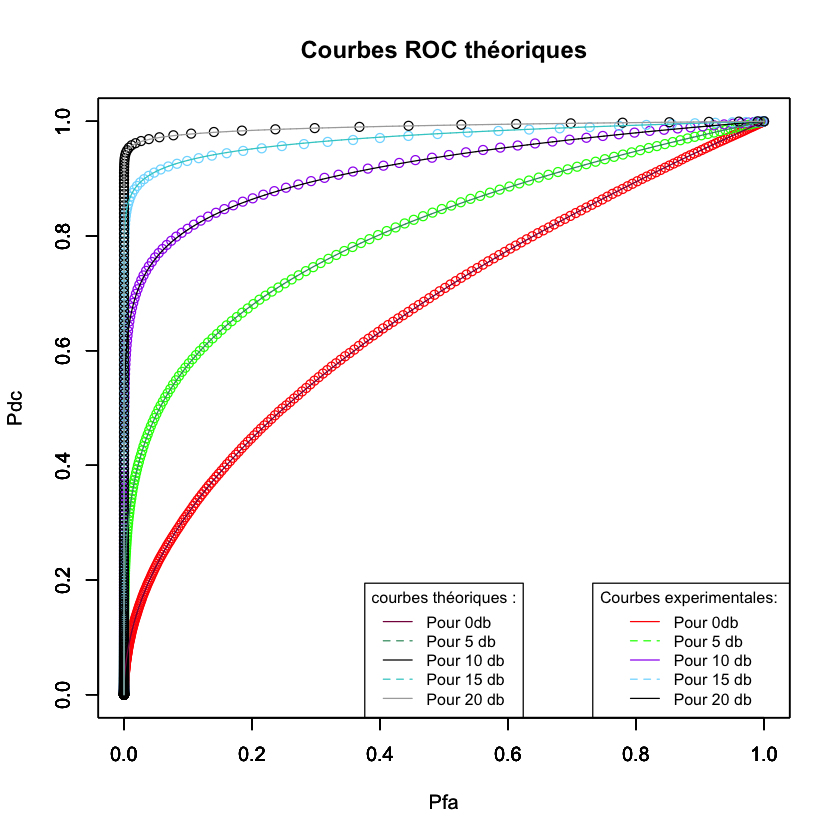

In [40]:

plot(Pfa, Pdc, sub = '', xlab = "Pfa", ylab = "Pdc", col= "red" )
par(new=TRUE) 
plot(Pfa5, Pdc5, xlab = "", ylab = "", col = " green")
par(new=TRUE) 
plot(Pfa10, Pdc10, xlab = "", ylab="", col = "purple")
par(new=TRUE) 
plot(Pfa15, Pdc15, xlab = "", ylab="", col = "#7FDBFF")
par(new=TRUE) 
plot(Pfa20, Pdc20, xlab = "", ylab="")
par(new=TRUE) 
curve (x^(0.5), from = 0, to=1 , n = 10000,  col = "#85144b", xlab = "Pfa", ylab = "Pdc", main = "Courbes ROC théoriques")
par(new=TRUE) 
curve (x^(0.2402), from = 0, to=1 , n = 10000, add = TRUE, col = "#3D9970")
par(new=TRUE) 
curve (x^(0.0909), from = 0, to=1 , n = 10000, add = TRUE, col = "black")
par(new=TRUE)
curve (x^(0.0306), from = 0, to=1 , n = 10000, add = TRUE, col = "#39CCCC")
par(new=TRUE)
curve (x^(0.0099), from = 0, to=1 , n = 10000, add = TRUE, col = "#AAAAAA")


legend("bottomright", legend=c("Pour 0db ","Pour 5 db ", "Pour 10 db ", "Pour 15 db", "Pour 20 db" ),
       col=c( "red","green","purple", "#7FDBFF", "black"), lty=1:2, cex=0.8, title = "Courbes experimentales: ")

legend("bottom", legend=c("Pour 0db ","Pour 5 db ", "Pour 10 db ", "Pour 15 db", "Pour 20 db" ),
       col=c( "#85144b","#3D9970","black", "#39CCCC", "#AAAAAA"), lty=1:2, cex=0.8,title = "courbes théoriques :")





# Distribution du la densité du signal fourni par le radar : 

Il s'agit de comparer la densité de l'amplitude signal calculé à partir des donnée avec celle d'une distribution de Rayleigh ( ici  Weilbull de parametres (2, 1.001). 

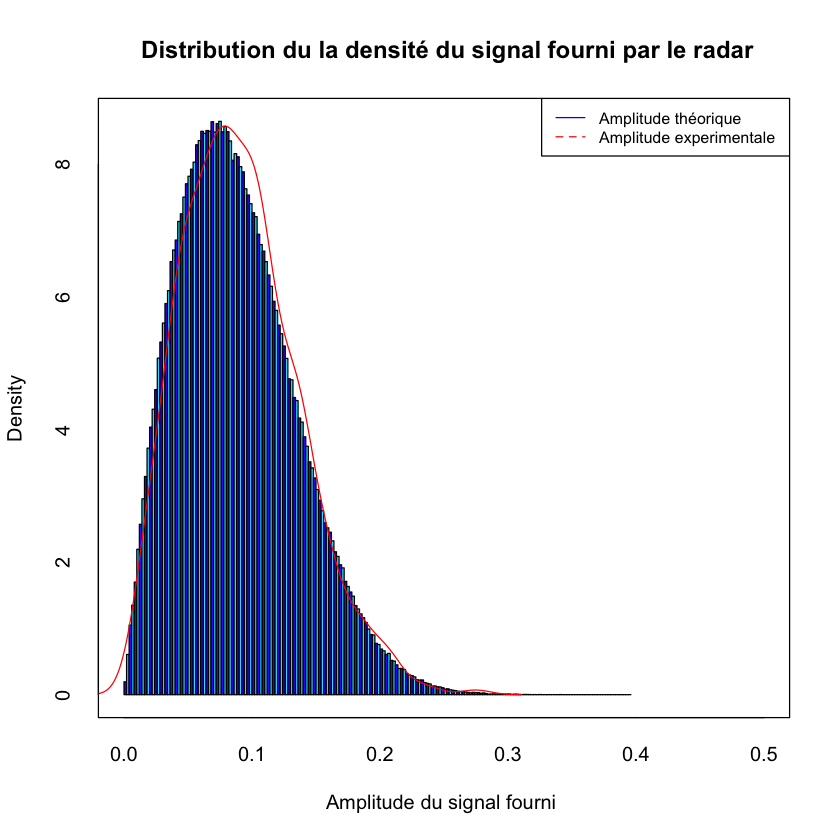

In [19]:
rw =rweibull(1000,2,0.102)
rd = density(rw)
h = hist(Amp,breaks=200, freq = F, col=topo.colors(2),tck=0,001, xlim=c(0, 0.5),
         xlab= "Amplitude du signal fourni ", main = " Distribution du la densité du signal fourni par le radar") 
box()
lines ( rd , col = "Red", type = "l")
legend("topright", legend=c("Amplitude théorique","Amplitude experimentale" ),
       col=c( "blue", "red"), lty=1:2, cex=0.8)
#legend("topright", inset=.02, 
 #  c("Courbe théorique","Courbe experimentale" ), fill=topo.colors(2), horiz=TRUE, cex=0.8)

# Courbes ROC théoriques et expérimentale pour chaque valeur de la puissance de transmission

## Pour 5db :

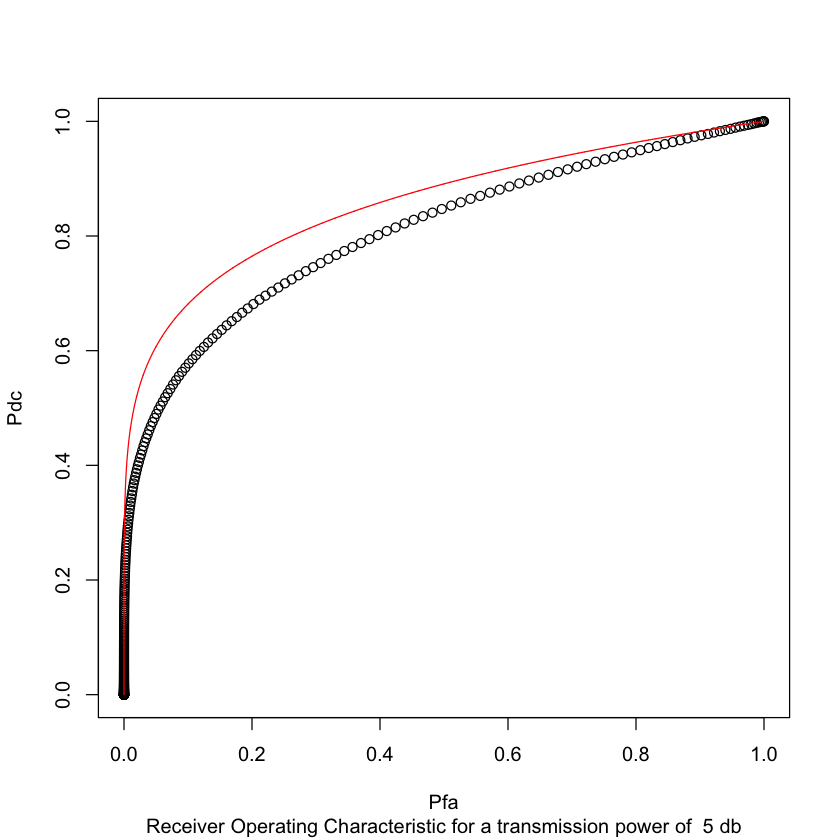

In [15]:
#Visualiser les courbes Roc Pour 5db. 
plot(Pfa5, Pdc5, sub = 'Receiver Operating Characteristic for a transmission power of  5 db' )

curve (x^(1/6), from = 0, to=1 , n = 10000, add = TRUE, col = "red")



## Pour 10 db : 

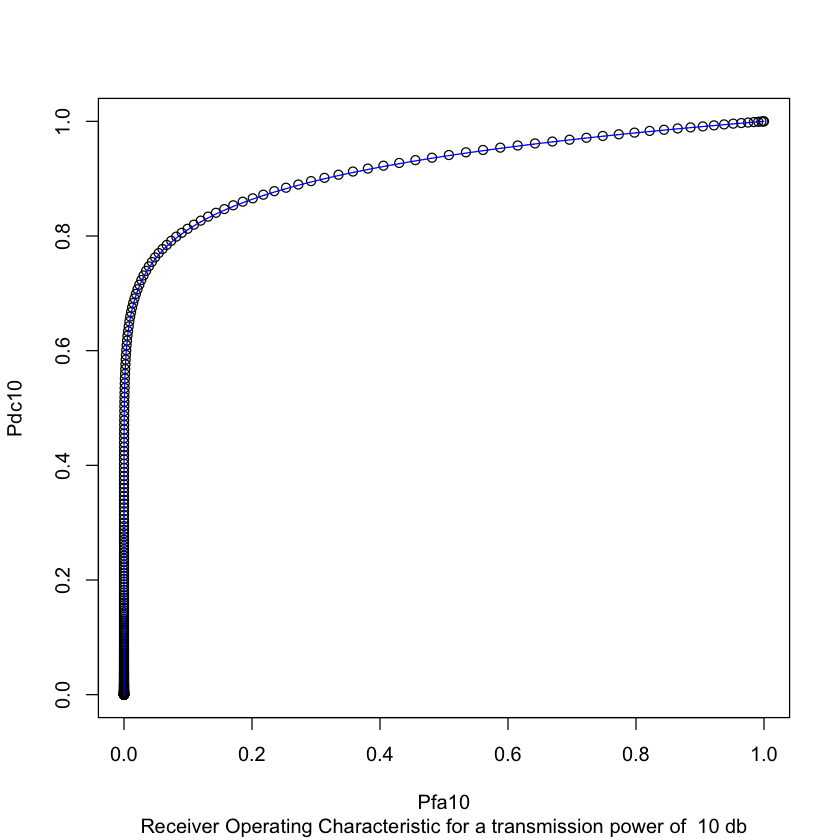

In [121]:
plot(Pfa10, Pdc10, sub = 'Receiver Operating Characteristic for a transmission power of  10 db' )

curve (x^(1/11), from = 0, to=1 , n = 10000, add = TRUE, col = "blue")



## Pour 20 db

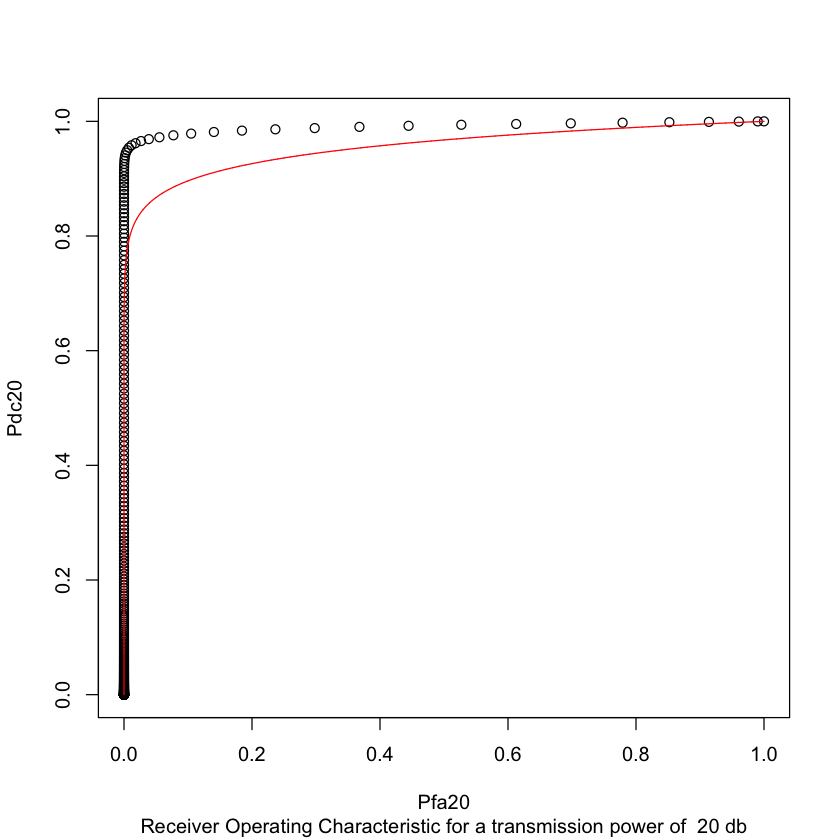

In [112]:
 
a = plot(Pfa20, Pdc20, sub='Receiver Operating Characteristic for a transmission power of  20 db' )


curve (x^(1/21), from = 0, to=1 , n = 10000, add = TRUE, col = "red")



# Visulalisation des courbes ROC ( $P_{DC} = f(P_{FA})$) théoriques pour différentes valeurs de la puissance de transmission. 

    
            



On a, $P_{DC}= (P_{FA})^{\frac{1 }{\rho +1}}$ ce qui permet de tracer les courbes suivantes : 

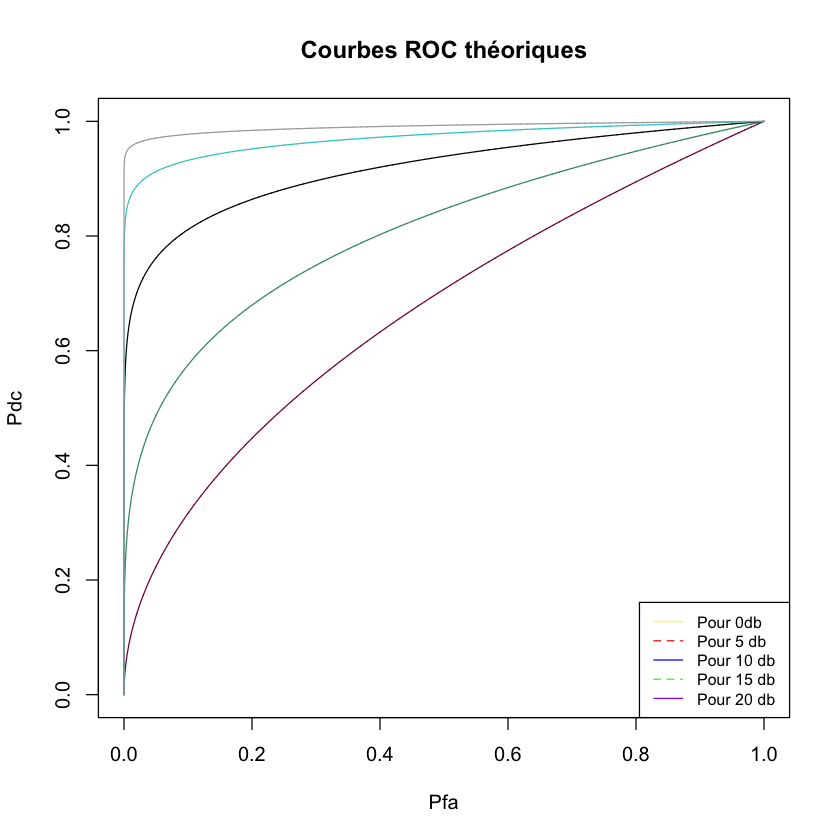

In [7]:


curve (x^(0.5), from = 0, to=1 , n = 10000,  col = "#85144b", xlab = "Pfa", ylab = "Pdc", main = "Courbes ROC théoriques")
par(new=TRUE) 
curve (x^(0.2402), from = 0, to=1 , n = 10000, add = TRUE, col = "#3D9970")
par(new=TRUE) 
curve (x^(0.0909), from = 0, to=1 , n = 10000, add = TRUE, col = "black")
par(new=TRUE)
curve (x^(0.0306), from = 0, to=1 , n = 10000, add = TRUE, col = "#39CCCC")
par(new=TRUE)
curve (x^(0.0099), from = 0, to=1 , n = 10000, add = TRUE, col = "#AAAAAA")


legend("bottomright", legend=c("Pour 0db ","Pour 5 db ", "Pour 10 db ", "Pour 15 db", "Pour 20 db" ),
       col=c("yellow",  "red","blue","green","purple" ), lty=1:2, cex=0.8)




In [114]:
library(ggplot2)

p = ggplot(d)+aes(x=sqrt(V3^2+V2^2) , y =..ndensity.., color = V1)+geom_histogram(bins=100, color = "green")
                                                                                                                                                                                                    

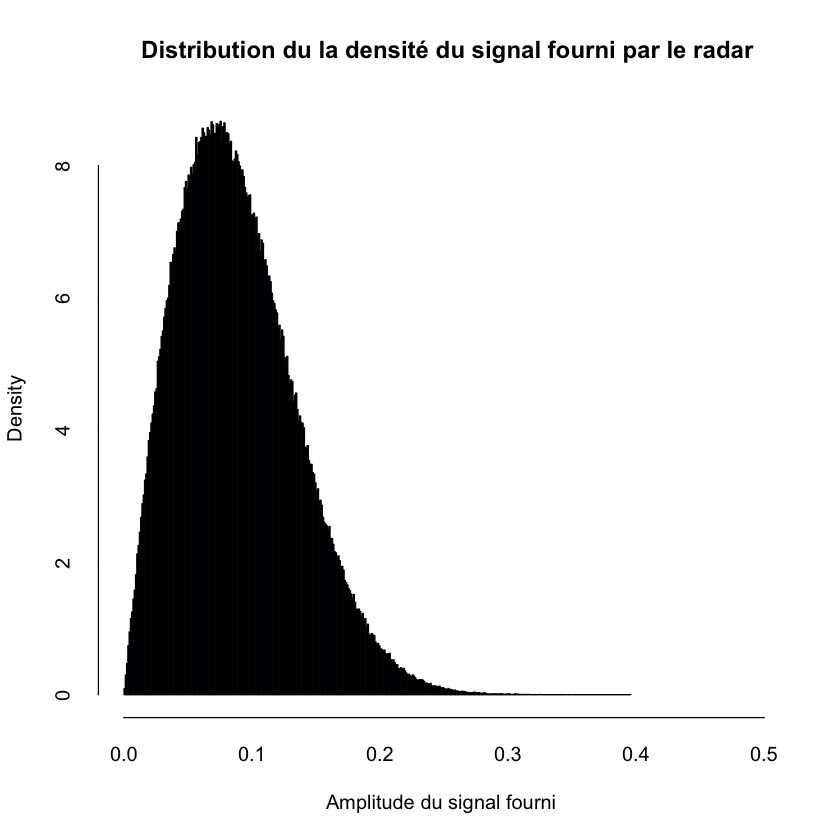

In [6]:

h = hist(Amp,breaks=300, freq = F, col=topo.colors(2),tck=0,001, xlim=c(0, 0.5),plot = TRUE,
         xlab= "Amplitude du signal fourni ", main = " Distribution du la densité du signal fourni par le radar")


In [6]:
a =1/(1+10^(0.5));a
b =1/(1+10);b
c =1/(1+10^(1.5));c
d =1/(1+10^2);d








[1] 0.2402531

[1] 0.09090909

[1] 0.03065343

[1] 0.00990099

In [39]:
help(hist)

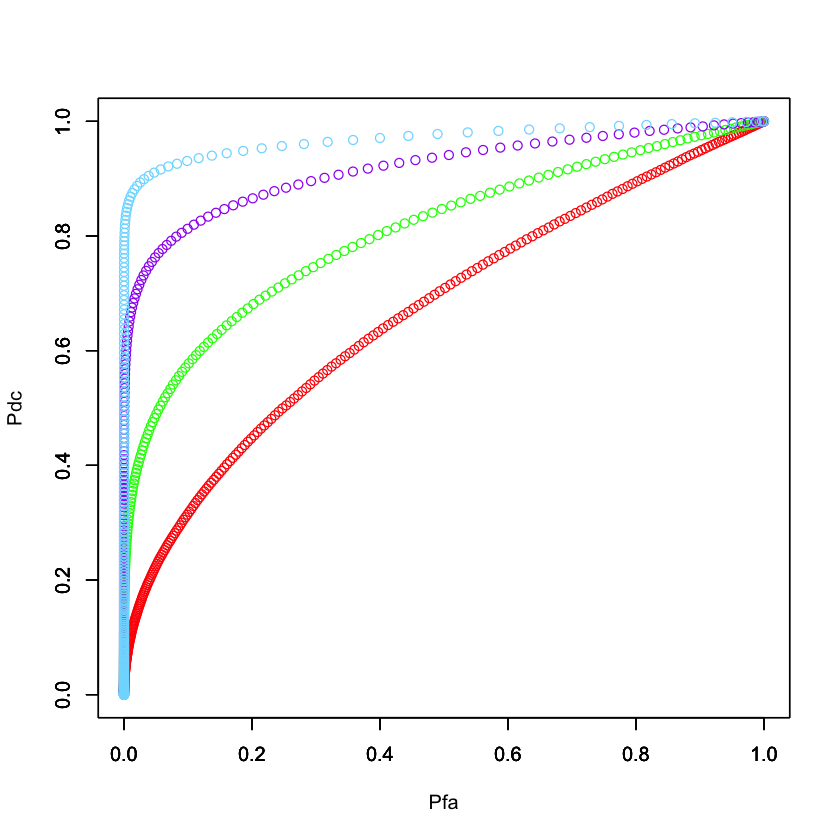

In [39]:
plot(Pfa, Pdc, sub = '', xlab = "Pfa", ylab = "Pdc", col= "red" )
par(new=TRUE) 
plot(Pfa5, Pdc5, xlab = "", ylab = "", col = " green")
par(new=TRUE) 
plot(Pfa10, Pdc10, xlab = "", ylab="", col = "purple")
par(new=TRUE) 
plot(Pfa15, Pdc15, xlab = "", ylab="", col = "#7FDBFF")
par(new=TRUE) 

In [41]:
help(plot)